In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import seaborn as sns
import numpy as np
import random

%matplotlib inline

In [2]:
df = pd.read_csv('../data/fr.openfoodfacts.org.products.csv', sep='\t')

/tmp/ipykernel_605/3243065608.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/fr.openfoodfacts.org.products.csv', sep='\t')


In [3]:
df.shape

(320772, 162)

In [4]:
df.loc[:, :'image_small_url'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 63 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   code                                        320749 non-null  object 
 1   url                                         320749 non-null  object 
 2   creator                                     320770 non-null  object 
 3   created_t                                   320769 non-null  object 
 4   created_datetime                            320763 non-null  object 
 5   last_modified_t                             320772 non-null  object 
 6   last_modified_datetime                      320772 non-null  object 
 7   product_name                                303010 non-null  object 
 8   generic_name                                52795 non-null   object 
 9   quantity                                    104819 non-null  object 
 

In [5]:
df.sample(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
254670,3760198324230,http://world-fr.openfoodfacts.org/produit/3760...,date-limite-app,1479640414,2016-11-20T11:13:34Z,1479640414,2016-11-20T11:13:34Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268126,4714089705218,http://world-fr.openfoodfacts.org/produit/4714...,date-limite-app,1448510498,2015-11-26T04:01:38Z,1461431072,2016-04-23T17:04:32Z,계란찜스프,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63580,51933627802,http://world-fr.openfoodfacts.org/produit/0051...,usda-ndb-import,1489060099,2017-03-09T11:48:19Z,1489060100,2017-03-09T11:48:20Z,Cherry Cheesecake Yogurt,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN
97782,78742100210,http://world-fr.openfoodfacts.org/produit/0078...,usda-ndb-import,1489094486,2017-03-09T21:21:26Z,1489094486,2017-03-09T21:21:26Z,Greek Nonfat Yogurt,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN
181897,2135003002602,http://world-fr.openfoodfacts.org/produit/2135...,openfood-ch-import,1486502619,2017-02-07T21:23:39Z,1487256616,2017-02-16T14:50:16Z,Fromage à pâte mi-dure,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242333,3564700577301,http://world-fr.openfoodfacts.org/produit/3564...,nash,1372072965,2013-06-24T11:22:45Z,1437032164,2015-07-16T07:36:04Z,"Tajine de bœuf, Légumes du soleil",Plat cuisiné aux légumes et au bœuf façon tajine,350 g (1 personne),...,NaN,39.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
239400,3560070751143,http://world-fr.openfoodfacts.org/produit/3560...,miles67off,1389201015,2014-01-08T17:10:15Z,1490275544,2017-03-23T13:25:44Z,Infusion Verveine Menthe Bio Carrefour,Infusion bio,"30 g (20 sachets de 1,5 g)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160732,853240003009,http://world-fr.openfoodfacts.org/produit/0853...,usda-ndb-import,1489057275,2017-03-09T11:01:15Z,1489057276,2017-03-09T11:01:16Z,"Bruschettini Toasts, Classico Virgin Olive Oil",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN
12828,15839022161,http://world-fr.openfoodfacts.org/produit/0015...,usda-ndb-import,1489075861,2017-03-09T16:11:01Z,1489075861,2017-03-09T16:11:01Z,"Garden Of Eatin, Tuscola Country Blue Corn, To...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
223822,3297560221533,http://world-fr.openfoodfacts.org/produit/3297...,date-limite-app,1456651465,2016-02-28T09:24:25Z,1456653480,2016-02-28T09:58:00Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_gen = df.loc[:, 'code':'packaging']
df_tags = df.loc[:, 'packaging':'ingredients_text']
df_ingredients = df.loc[:, 'ingredients_text':'serving_size']
df_misc = df.loc[:, 'serving_size':'energy_100g']
df_nutrition = df.loc[:, 'energy_100g':]

In [7]:
df_gen.sample(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging
120853,639277577337,http://world-fr.openfoodfacts.org/produit/0639...,usda-ndb-import,1489051578,2017-03-09T09:26:18Z,1489051578,2017-03-09T09:26:18Z,Crushed Red Pepper Seasoning,NaN,NaN,NaN
181875,2129329004853,http://world-fr.openfoodfacts.org/produit/2129...,openfoodfacts-contributors,1489522207,2017-03-14T20:10:07Z,1489522282,2017-03-14T20:11:22Z,Roastbeef,NaN,"0,068 kg",NaN
117684,608623000355,http://world-fr.openfoodfacts.org/produit/0608...,usda-ndb-import,1489053582,2017-03-09T09:59:42Z,1489053582,2017-03-09T09:59:42Z,Specially-Seasoned Turnip Greens,NaN,NaN,NaN
259383,4009286151211,http://world-fr.openfoodfacts.org/produit/4009...,date-limite-app,1476815576,2016-10-18T18:32:56Z,1476815576,2016-10-18T18:32:56Z,NaN,NaN,NaN,NaN
186268,277610848553281500000175,http://world-fr.openfoodfacts.org/produit/2776...,openfood-ch-import,1486499688,2017-02-07T20:34:48Z,1486499689,2017-02-07T20:34:49Z,NaN,NaN,NaN,NaN
93475,77400128634,http://world-fr.openfoodfacts.org/produit/0077...,usda-ndb-import,1489133330,2017-03-10T08:08:50Z,1489133330,2017-03-10T08:08:50Z,Honey Roasted Turkey,NaN,NaN,NaN
257326,4002575475166,http://world-fr.openfoodfacts.org/produit/4002...,kakao,1474126818,2016-09-17T15:40:18Z,1474301410,2016-09-19T16:10:10Z,Fruchtcreme Himbeeren,"Himbeeren Fruchtaufstrich, fein passiert",200 g,Glas
199565,3220033120002,http://world-fr.openfoodfacts.org/produit/3220...,domdom26,1426251998,2015-03-13T13:06:38Z,1426333162,2015-03-14T11:39:22Z,Les buchettes,Sucre blanc en poudre,500 g (100 x 1 g),Carton
179251,20320416,http://world-fr.openfoodfacts.org/produit/2032...,openfoodfacts-contributors,1457952438,2016-03-14T10:47:18Z,1457952528,2016-03-14T10:48:48Z,Selektion Delicatess Leberwurst,NaN,NaN,NaN
75735,71419882020,http://world-fr.openfoodfacts.org/produit/0071...,usda-ndb-import,1489136714,2017-03-10T09:05:14Z,1489136714,2017-03-10T09:05:14Z,Chunk Style Premium Turkey Pie,NaN,NaN,NaN


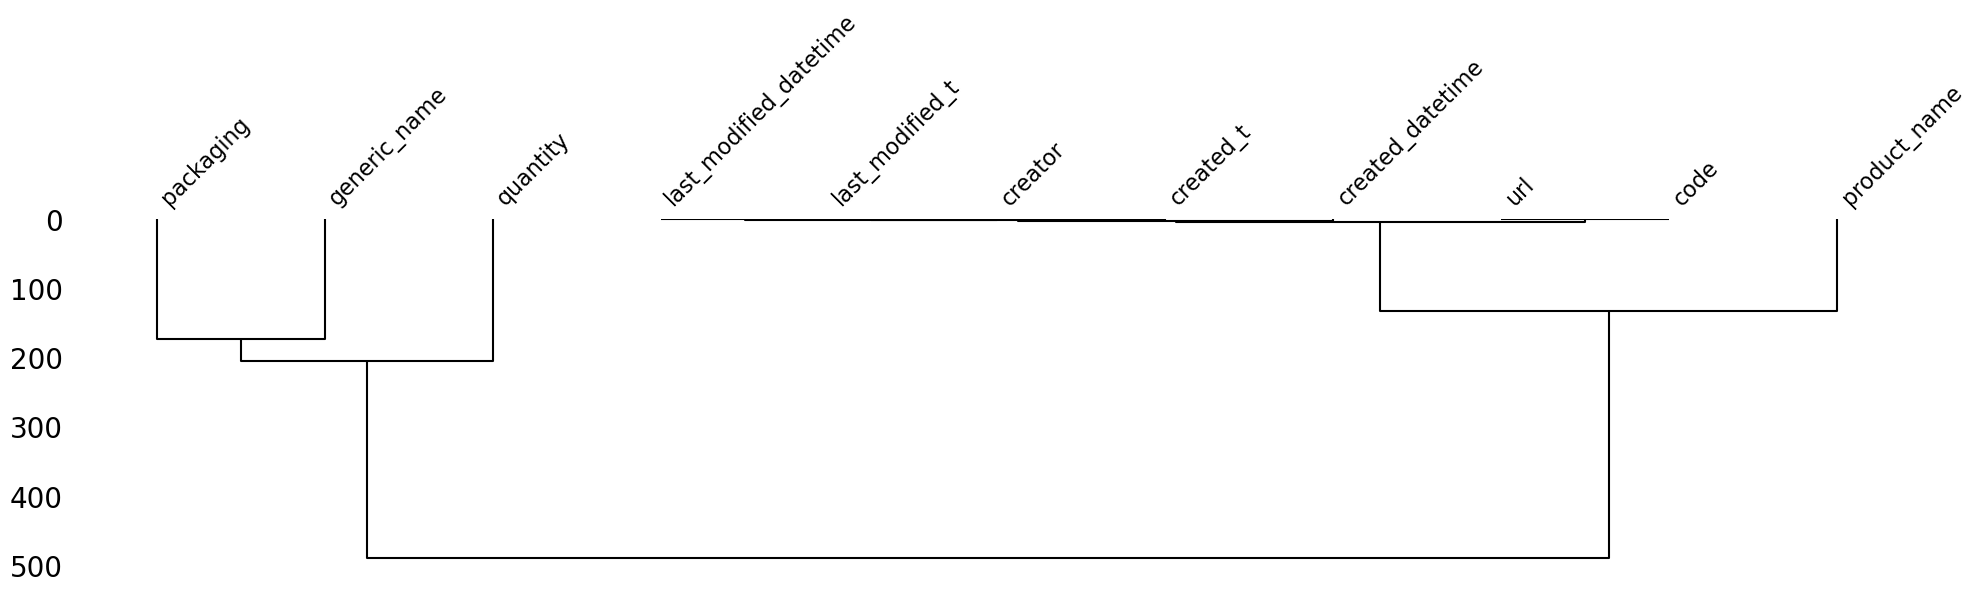

In [8]:
msno.dendrogram(df_gen, figsize=(20, 6))
plt.tight_layout()
plt.show()

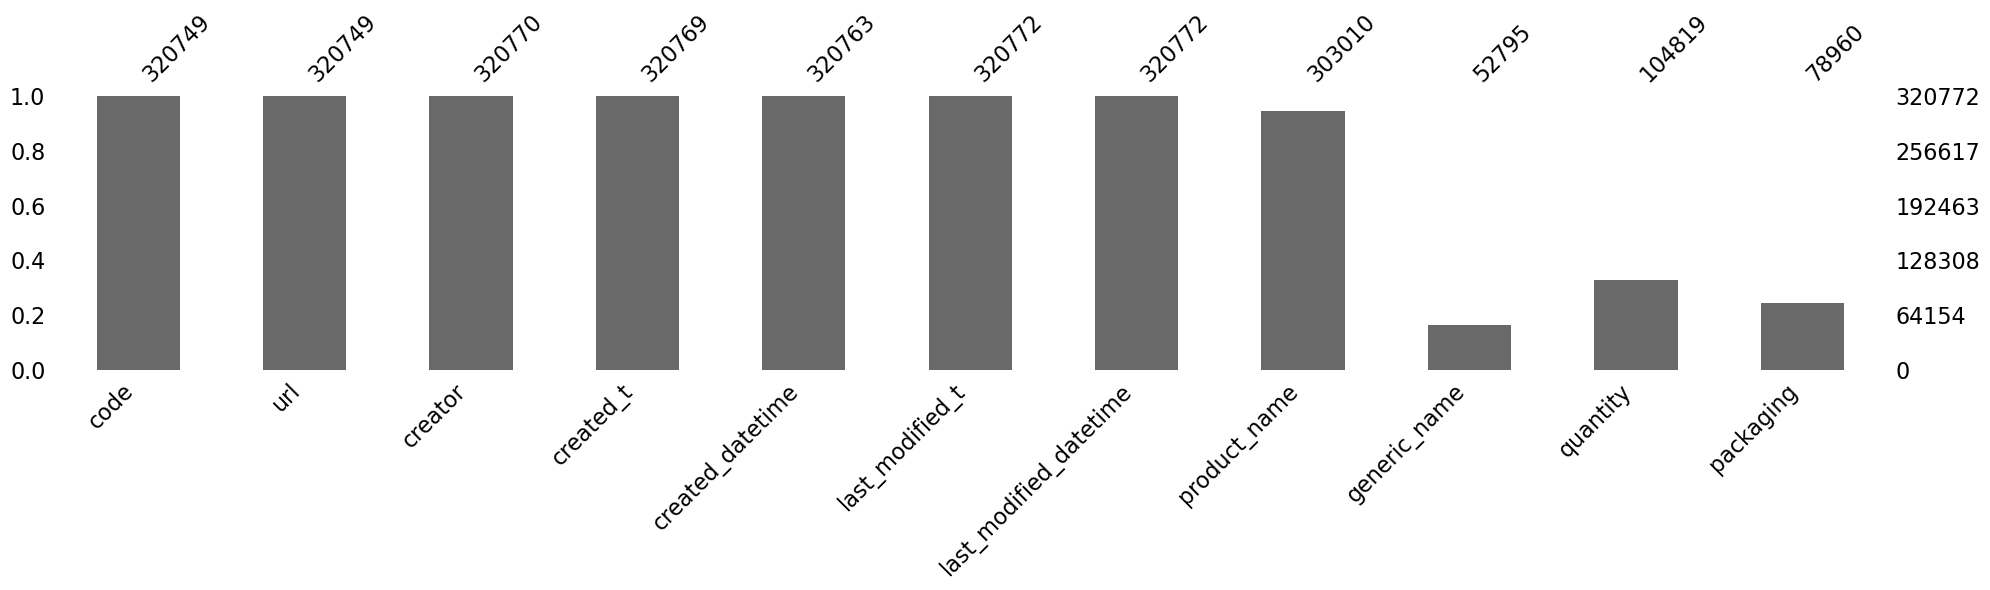

In [9]:
msno.bar(df_gen, figsize=(20, 6))
plt.tight_layout()
plt.show()

In [10]:
df_tags.sample(10)

,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,...,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text
281817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Denmark,en:denmark,Danemark,NaN
168139,NaN,NaN,Oregon Hill Farms,oregon-hill-farms,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Dark brown sugar, ketchup (tomato concentrate ..."
135960,NaN,NaN,"Haggen, Haggen Inc.","haggen,haggen-inc",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Corn syrup, high fructose corn syrup, water, n..."
179559,"Pot,Verre","pot,verre",Kania,kania,"Sauces bourguignonnes,Sauces","en:groceries,en:sauces,fr:sauces-bourguignonnes","Epicerie,Sauces,Sauces-bourguignonnes",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Lyon,France",LIDL,France,en:france,France,"Huile de colza, double concentré de tomates, e..."
311604,"Pot,Verre","pot,verre",Dia,dia,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"paris,france",Dia,France,en:france,France,"Eau, légumes 12,5 % (oignons 8,5 %, poivrons r..."
54997,NaN,NaN,Cinnamon Toasters,cinnamon-toasters,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Whole grain wheat, sugar, rice flour, canola o..."
124456,NaN,NaN,Food Basics,food-basics,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Corn syrup, sugar, gelatin, citric acid, sorbi..."
192315,NaN,NaN,Leerdammer,leerdammer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Belgium,en:belgium,Belgique,NaN
188635,NaN,NaN,La Laitière,la-laitiere,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN
258297,Artikel,artikel,Reinert,reinert,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,en:DE,en:germany,Allemagne,NaN


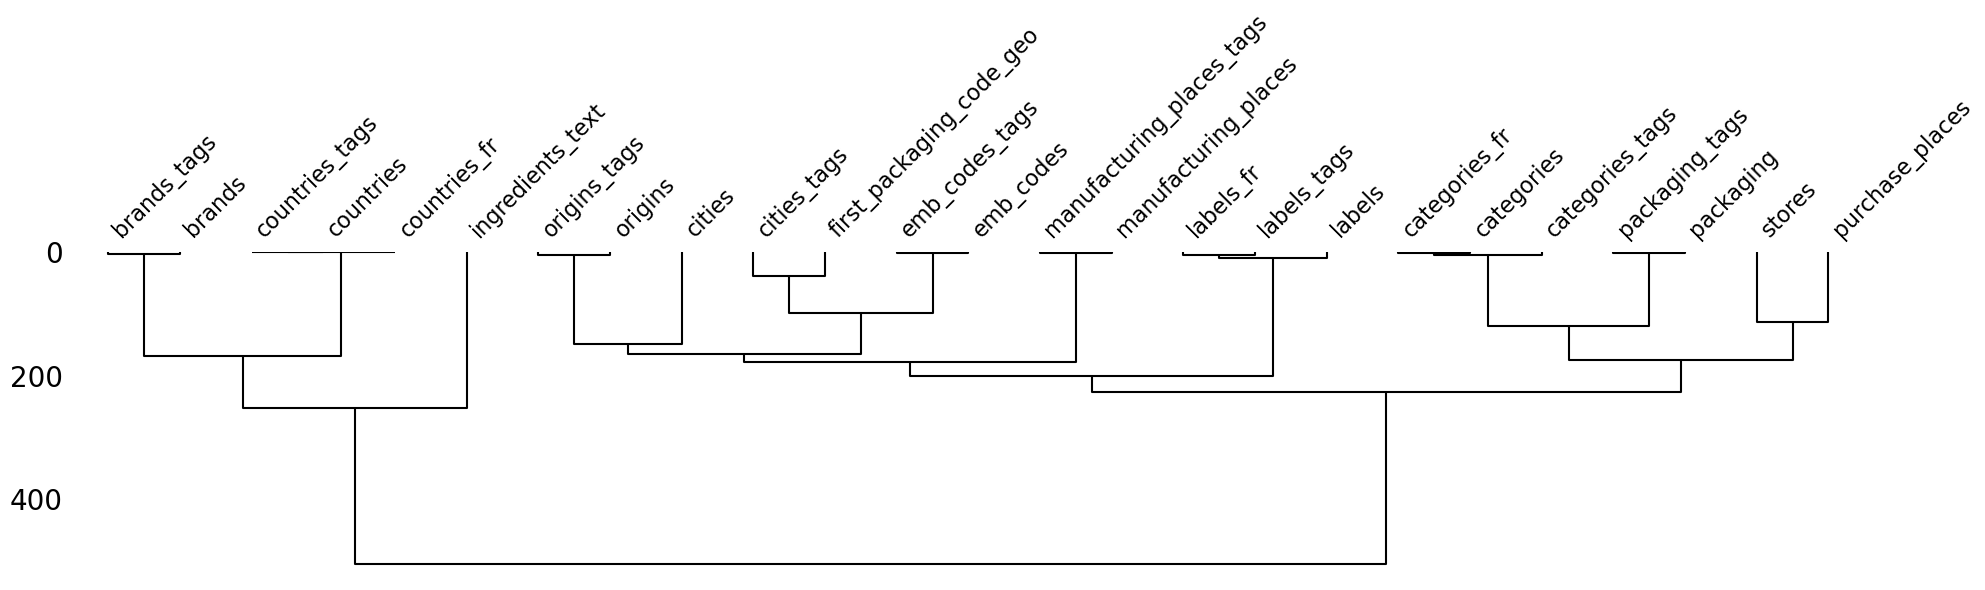

In [11]:
msno.dendrogram(df_tags, figsize=(20, 6))
plt.tight_layout()
plt.show()

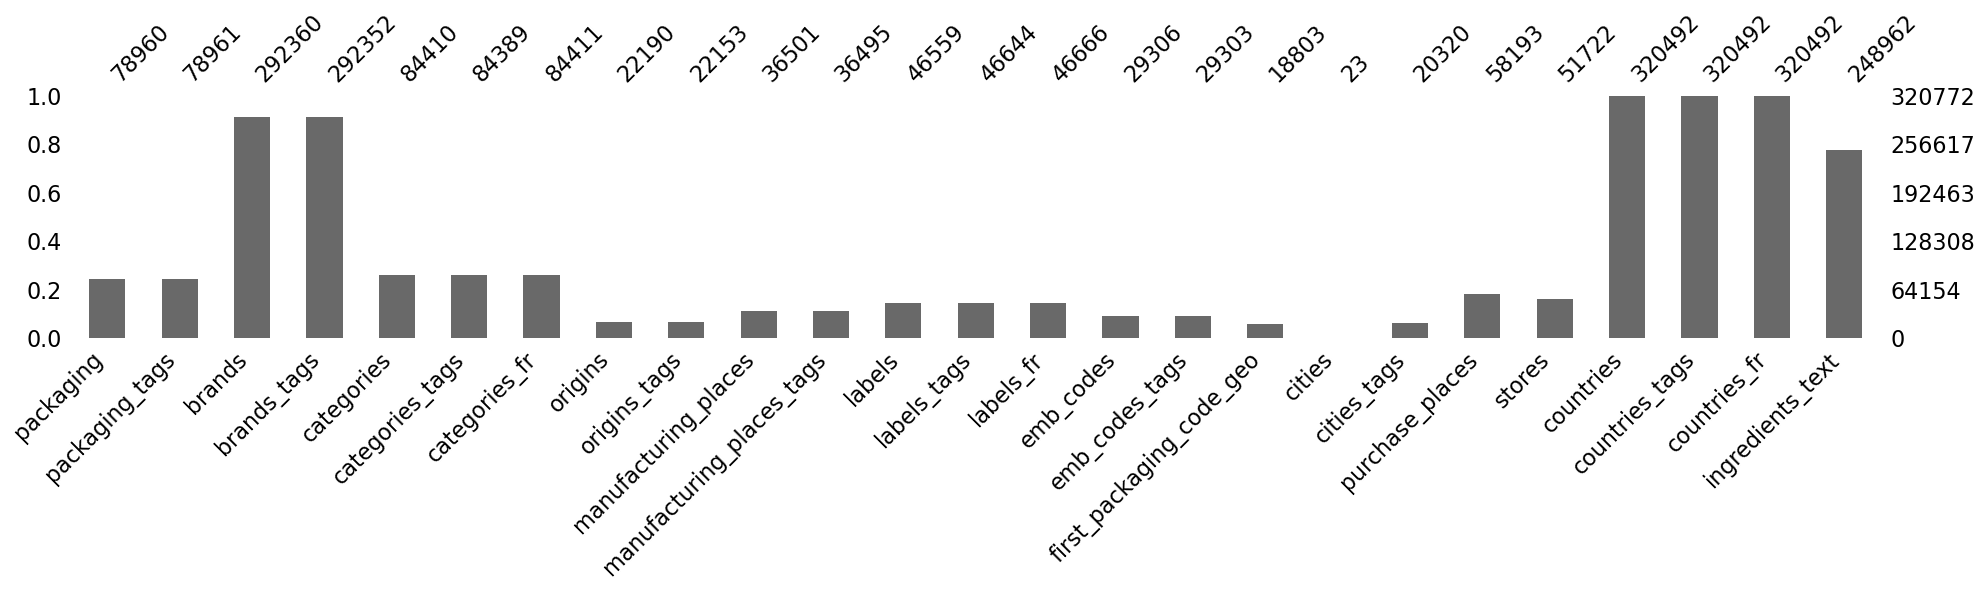

In [12]:
msno.bar(df_tags, figsize=(20, 6))
plt.tight_layout()
plt.show()

In [13]:
df_ingredients.sample(10)

,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size
228680,"Mini nems poulet : Galette 44,4 % (eau, farine...","SOJA, SOJA, SOJA, BLÉ, POISSON",NaN,"Crustacés,Œufs,Lait,Mollusques,Soja","en:crustaceans,en:eggs,en:milk,en:molluscs,en:...","Crustacés,Œufs,Lait,Mollusques,Soja",NaN
159789,"Organic cultured pasteurized whole milk, organ...",NaN,NaN,NaN,NaN,NaN,142 g (5 ONZ)
230604,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157218,"White corn, vegetable oil (canola and/or sunfl...",NaN,NaN,NaN,NaN,NaN,28 g (1 oz)
117947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240348,Filets de _maquereaux_ grillés 64 % (Scomber s...,maquereaux,NaN,"Lait,Moutarde","en:milk,en:mustard","Lait,Moutarde",42.5 g
268160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104238,"Shrimp filling (rice noodles [rice noodles, wa...",NaN,NaN,NaN,NaN,NaN,94 g (3 ROLLS)
252497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27673,"Stick: dextrose, citric acid, malic acid, malt...",NaN,NaN,NaN,NaN,NaN,8.4 g (1 PIECE)


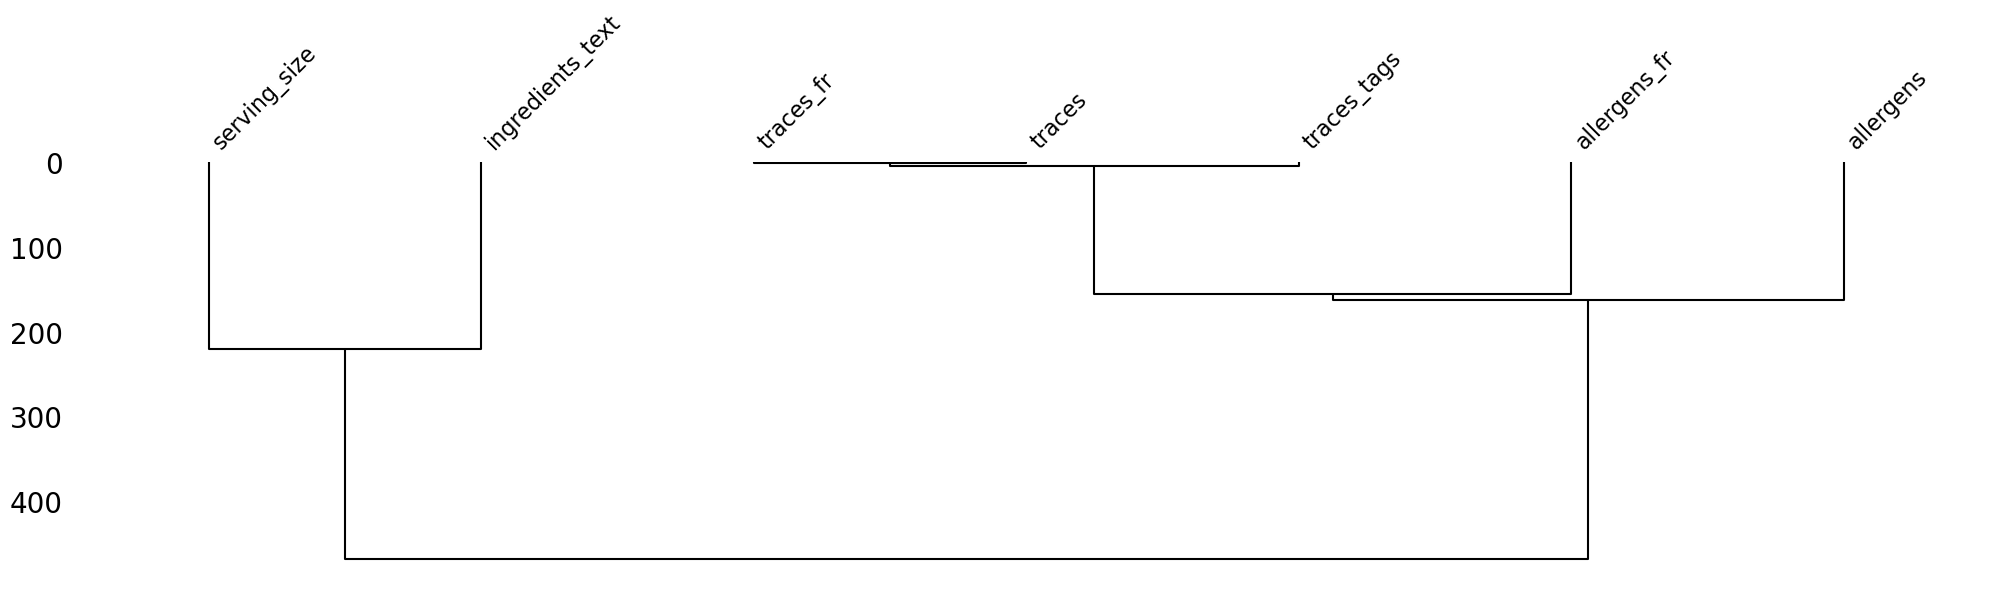

In [14]:
msno.dendrogram(df_ingredients, figsize=(20, 6))
plt.tight_layout()
plt.show()

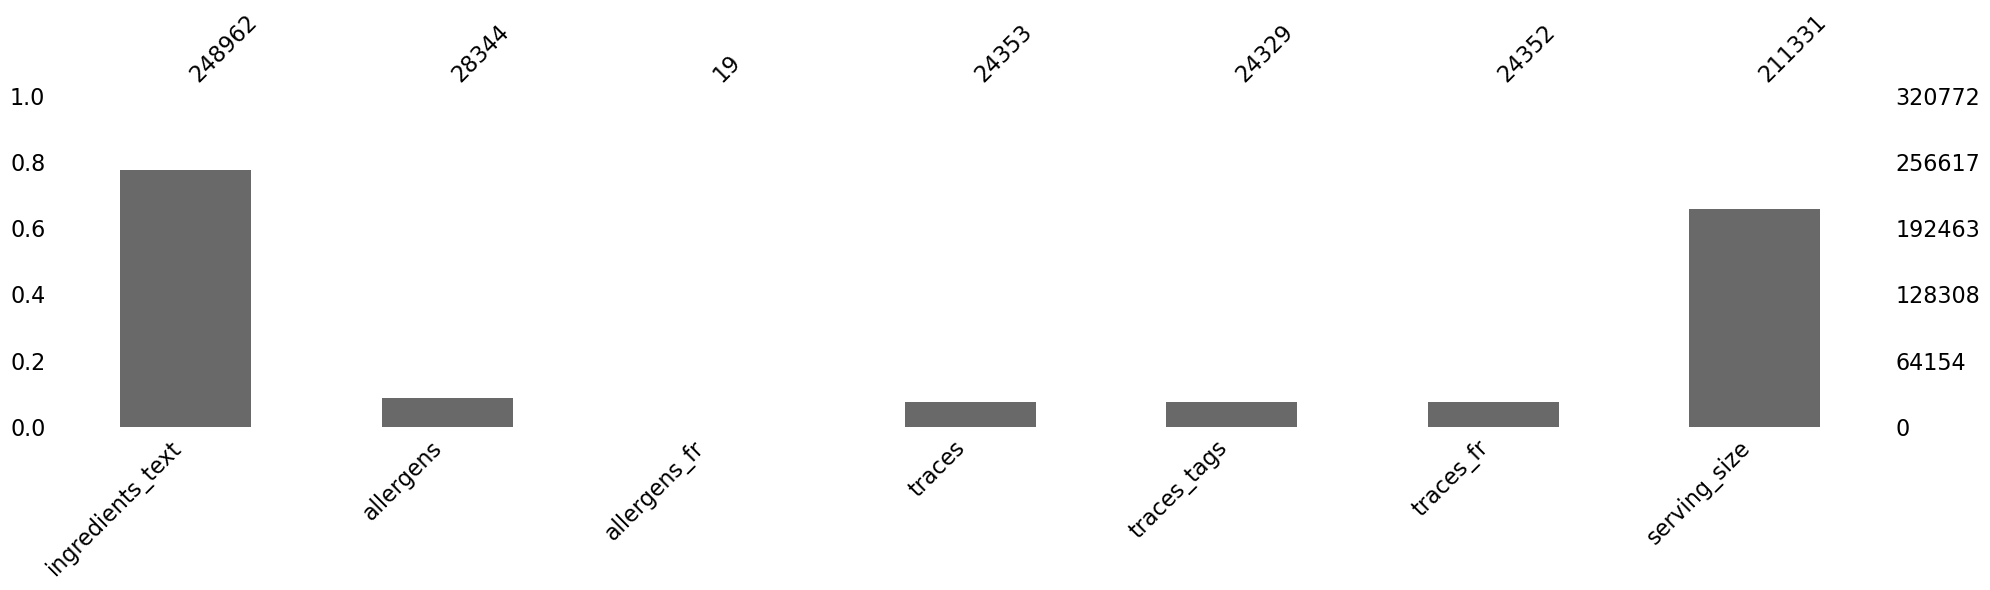

In [15]:
msno.bar(df_ingredients, figsize=(20, 6))
plt.tight_layout()
plt.show()

In [16]:
df_misc.sample(10)

,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,...,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g
58457,68 g (1 LINK),NaN,1.0,[ organic-skinless-chicken -> en:organic-skin...,en:e509,E509 - Chlorure de calcium,0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,494.0
175811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Cereals and potatoes,Cereals,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:rices,Riz,http://fr.openfoodfacts.org/images/products/20...,http://fr.openfoodfacts.org/images/products/20...,1529.0
11133,35 g (2 Tbsp),NaN,2.0,[ high-fructose-corn-syrup -> en:high-fructos...,"en:e150a,en:e211","E150a - Caramel E150a,E211 - Benzoate de sodium",0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,715.0
49006,240 ml (1 cup),NaN,0.0,[ organic-grade-a-reduced-fat-milk -> en:orga...,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,209.0
108166,30 ml (2 Tbsp),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,556.0
1261,0.49 g (1 PIECE),NaN,3.0,[ sugar -> en:sugar ] [ maltodextrin -> en:...,"en:e414,en:e572,en:e903","E414 - Gomme d'acacia,E572 - C36H70MgO4,E903 -...",0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1623.0
2018,34 g (2 Tbsp),NaN,4.0,[ tomato-puree -> en:tomato-puree ] [ puree...,"en:e150a,en:e330,en:e415,en:e211","E150a - Caramel E150a,E330 - Acide citrique,E4...",0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,615.0
304013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN
98043,140 g (1 cup),NaN,0.0,[ dark-sweet-cherries -> en:dark-sweet-cherri...,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,268.0
145336,85 g (3 ONZ),NaN,0.0,[ lentils -> en:lentils ] [ yellow-onion ->...,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,494.0


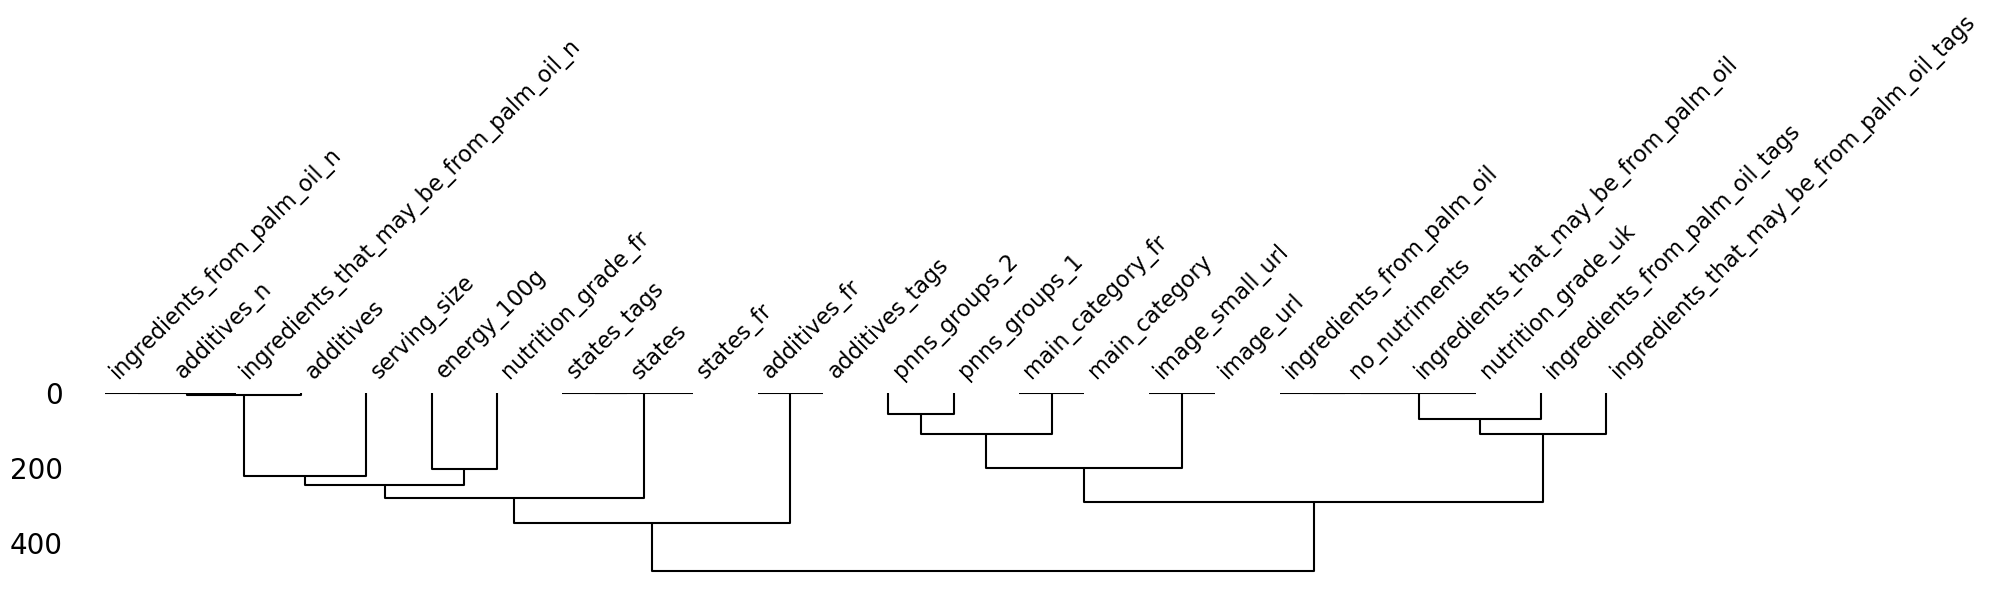

In [17]:
msno.dendrogram(df_misc, figsize=(20, 6))
plt.tight_layout()
plt.show()

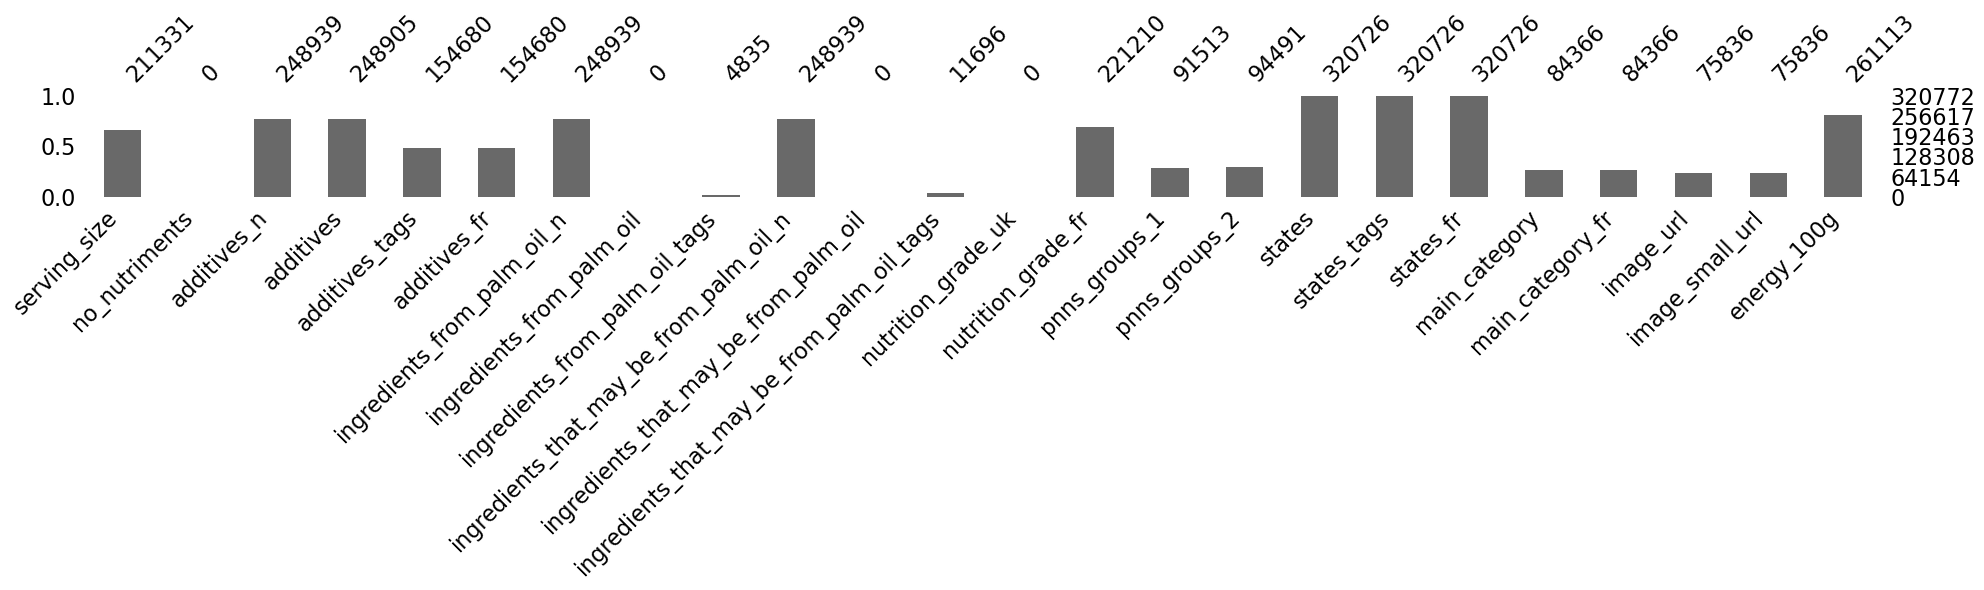

In [20]:
msno.bar(df_misc, figsize=(20, 6))
plt.tight_layout()
plt.show()

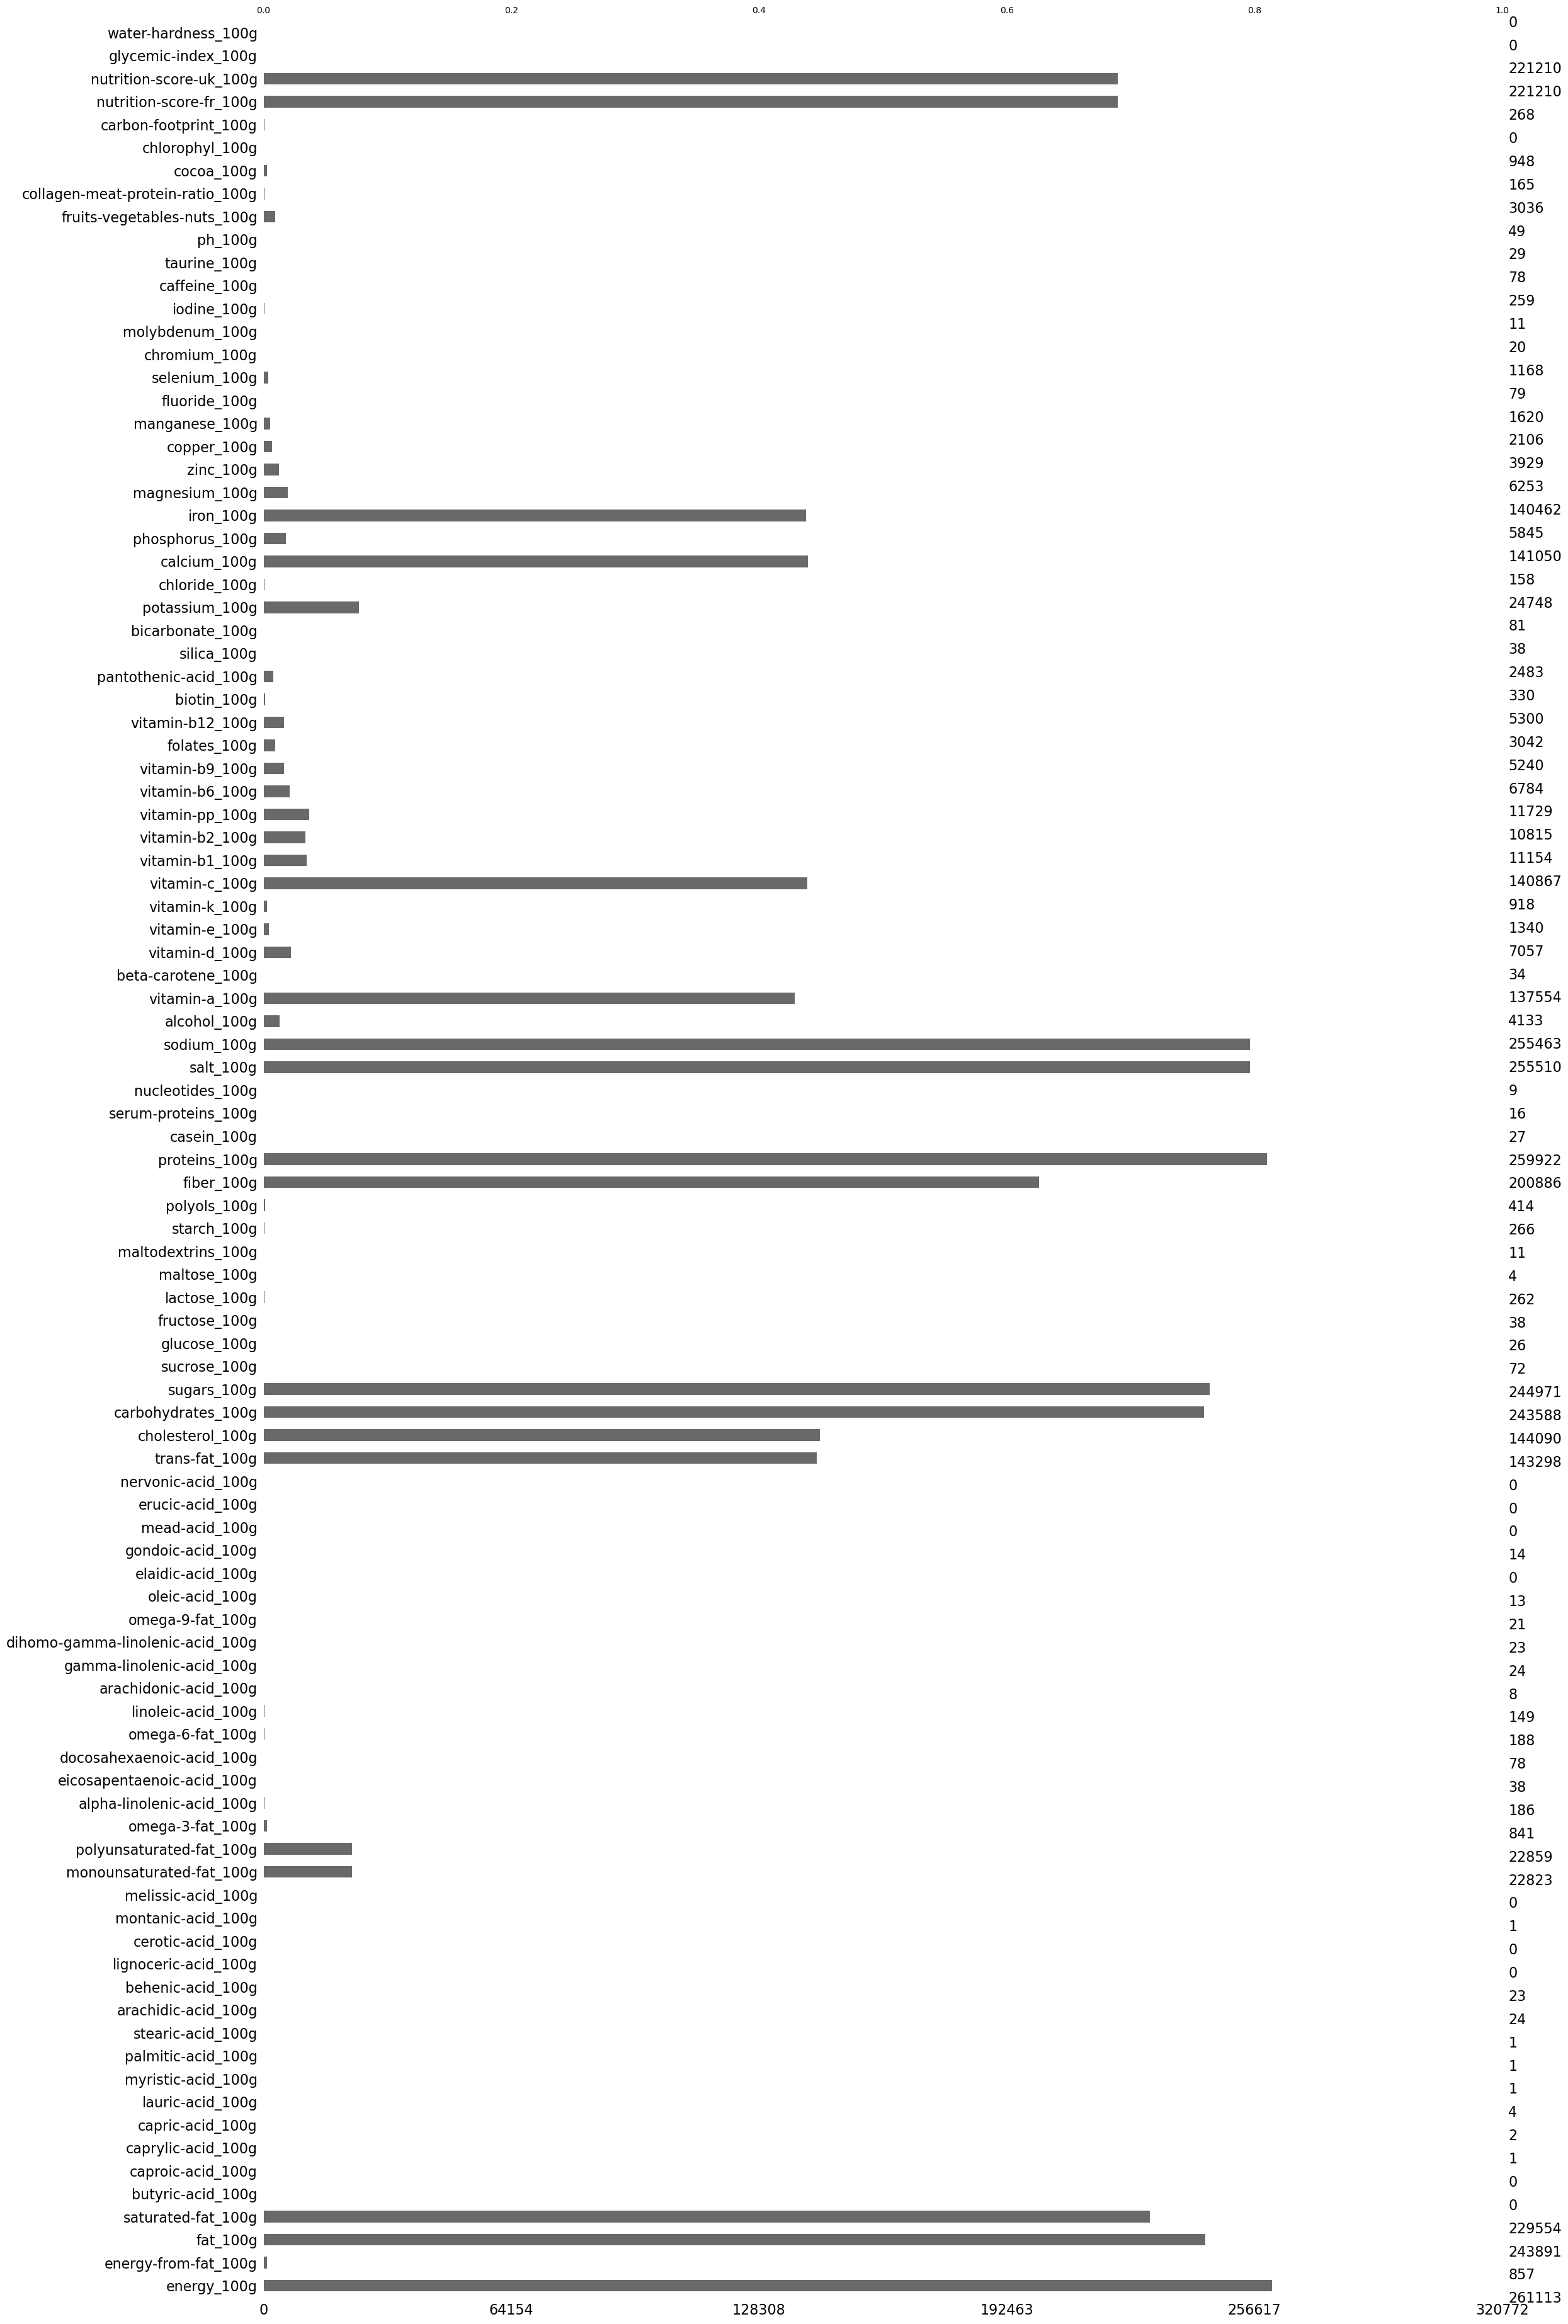

In [21]:
msno.bar(df_nutrition)
plt.tight_layout()
plt.show()

In [223]:
target = 'main_category'

features = [
    'ingredients_text',
    'brands',
    'saturated-fat_100g',
    'sugars_100g',
    'proteins_100g',
    'energy_100g',
]

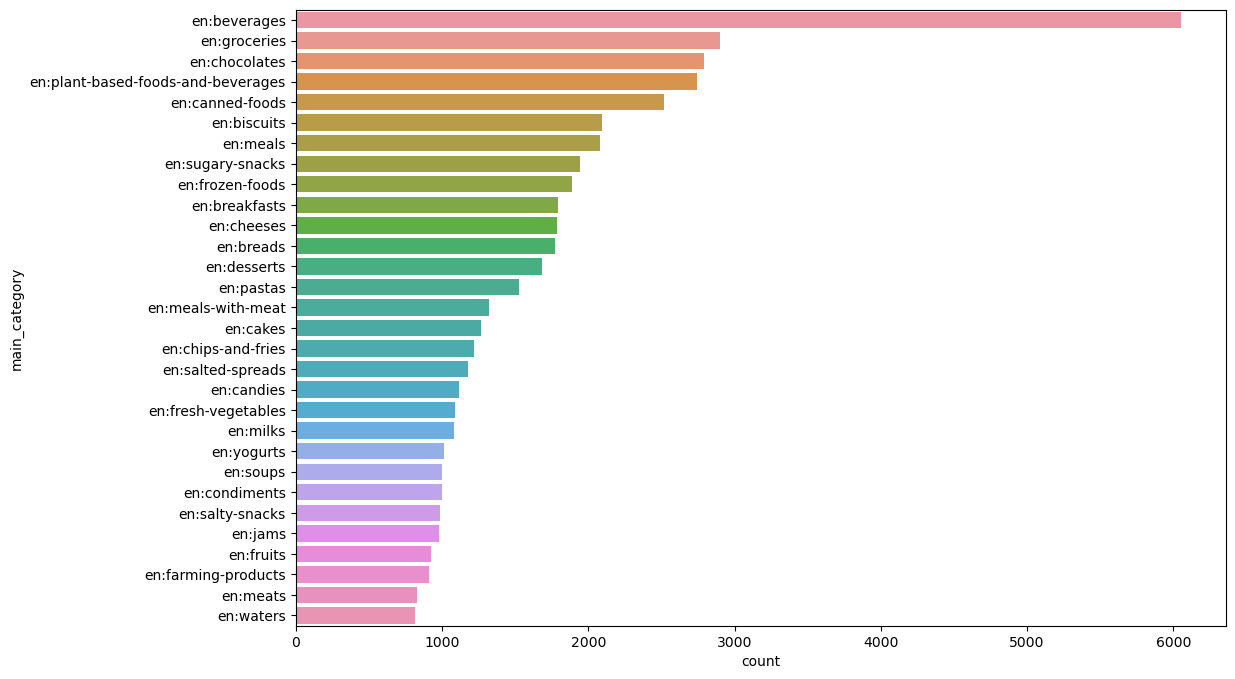

In [61]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_misc, y='main_category', order=df_misc.main_category.value_counts()[:30].index)
plt.show()

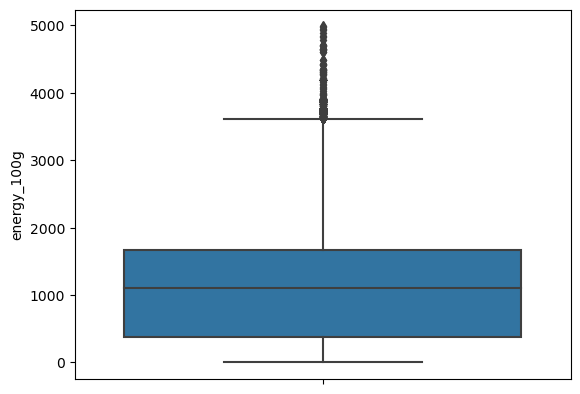

In [191]:
sns.boxplot(y = df_nutrition['energy_100g'][
                    ~df_nutrition['energy_100g'].isna()][
                        df_nutrition['energy_100g'] < 5000])
plt.show()

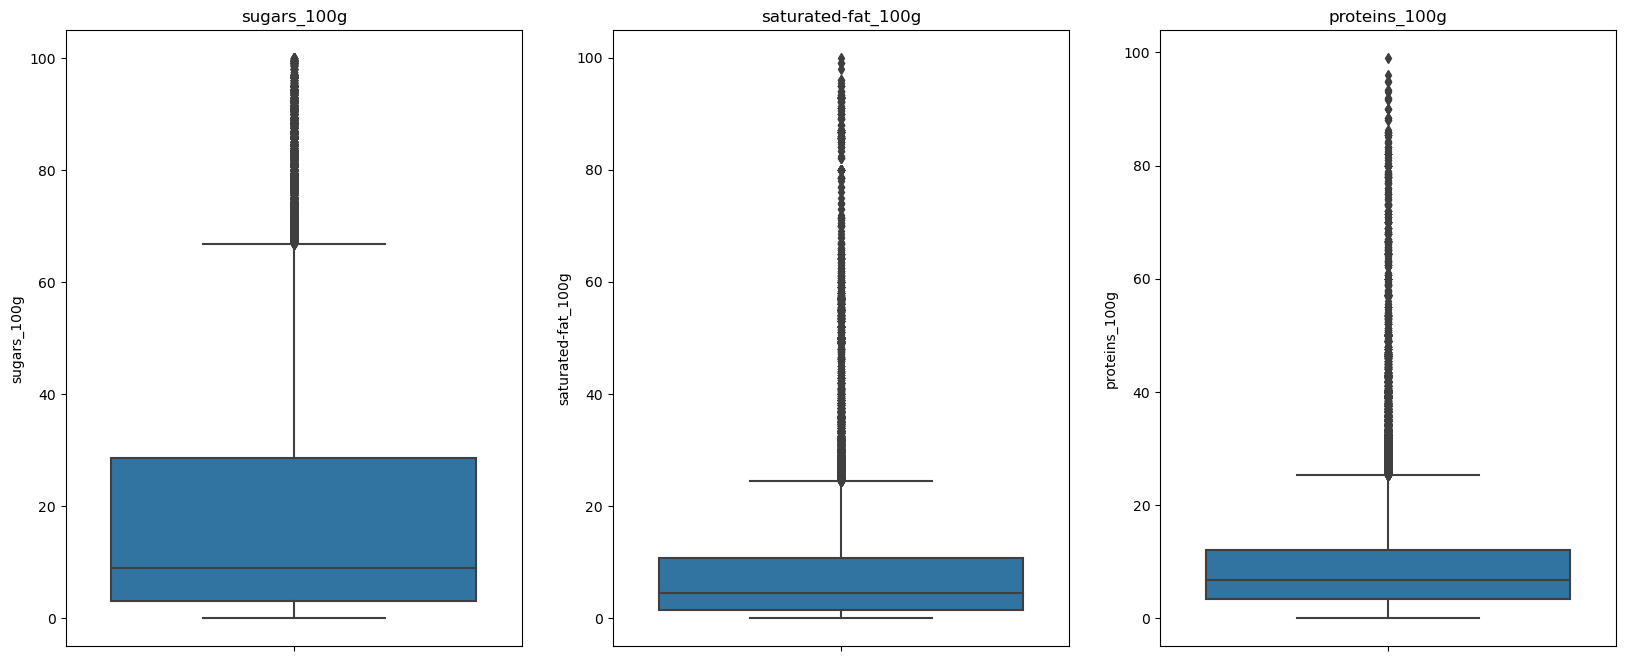

In [194]:
fig = plt.figure(figsize=(20,8))

for i, label in enumerate(['sugars_100g', 'saturated-fat_100g', 'proteins_100g']):
    fig.add_subplot(1, 3, i + 1)
    sns.boxplot(y = df_nutrition[label][
                        ~df_nutrition[label].isna()][
                            df_nutrition[label] < 100][
                                df_nutrition[label] > 0])
    plt.title(label)
plt.show()

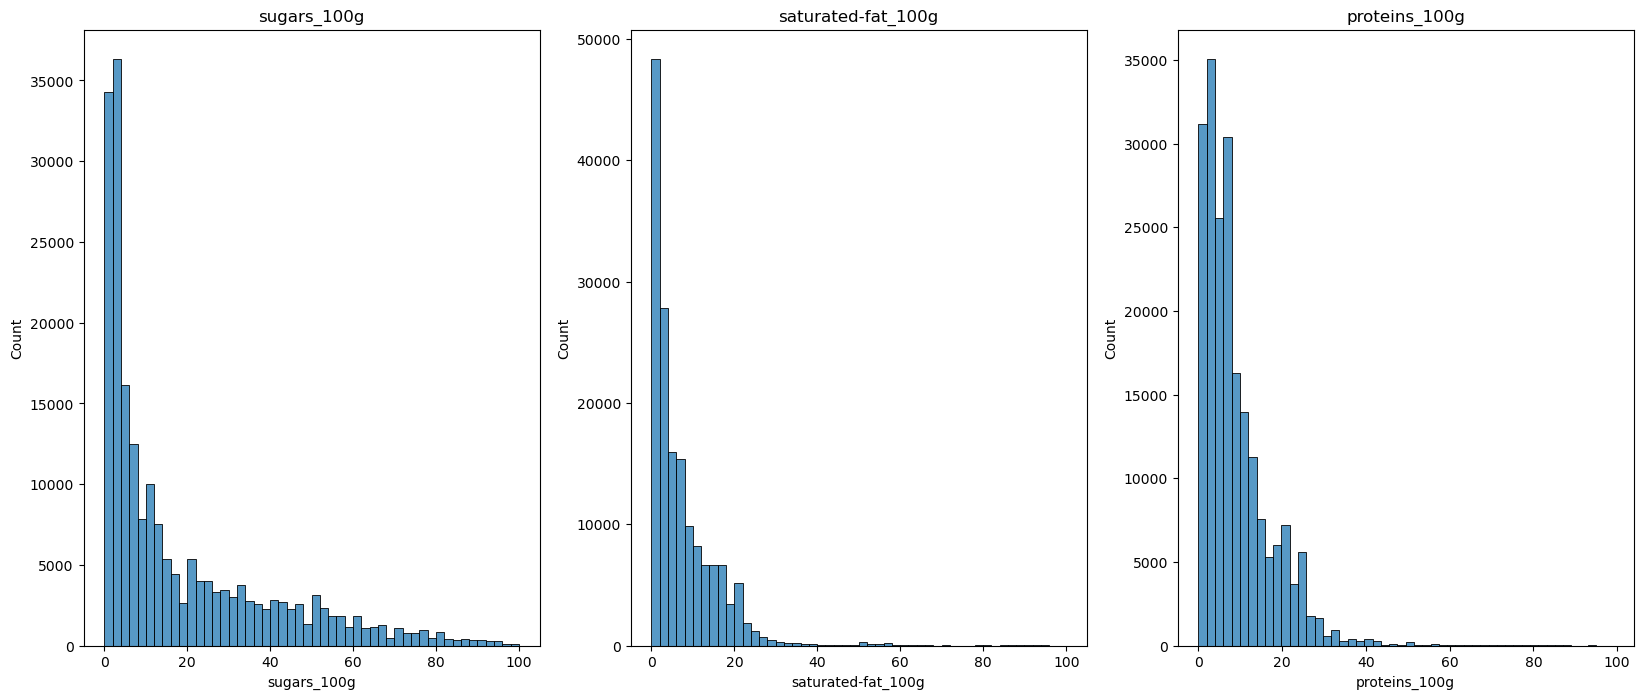

In [239]:
fig = plt.figure(figsize=(20,8))

for i, label in enumerate(['sugars_100g', 'saturated-fat_100g', 'proteins_100g']):
    fig.add_subplot(1, 3, i + 1)
    sns.histplot(df_nutrition[label][
            ~df_nutrition[label].isna()][
                df_nutrition[label] < 100][
                    df_nutrition[label] > 0
                        ], bins=50)
    plt.title(label)
plt.show()

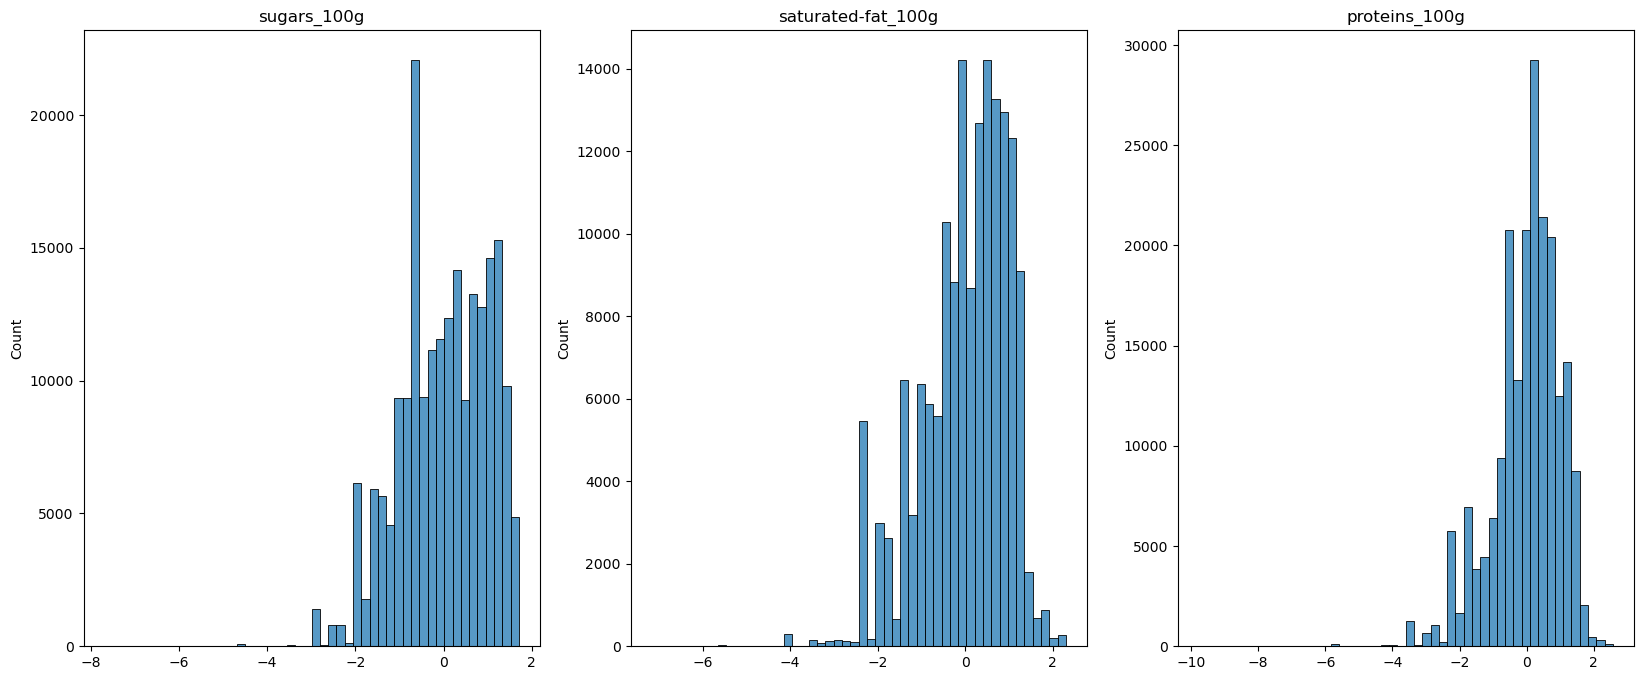

In [243]:
from sklearn.preprocessing import scale

fig = plt.figure(figsize=(20,8))

for i, label in enumerate(['sugars_100g', 'saturated-fat_100g', 'proteins_100g']):
    fig.add_subplot(1, 3, i + 1)
    standard = scale(df_nutrition[label][
                        ~df_nutrition[label].isna()][
                            df_nutrition[label] < 100][
                                df_nutrition[label] > 0
                                    ].apply(np.log))
    sns.histplot(standard, bins=50)
    plt.title(label)
plt.show()

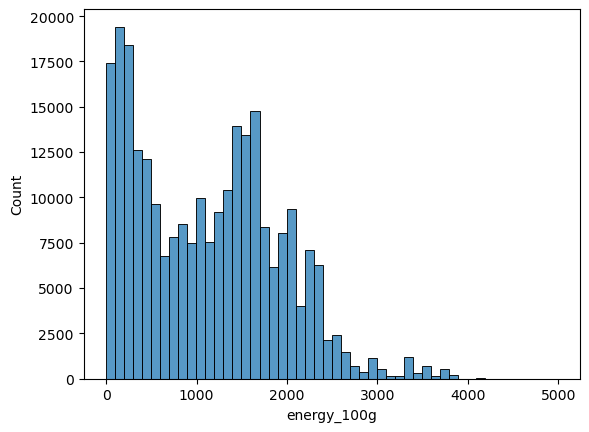

In [240]:
sns.histplot(df_nutrition['energy_100g'][
    ~df_nutrition['energy_100g'].isna()][
        df_nutrition['energy_100g'] < 5000], bins=50)

plt.show()

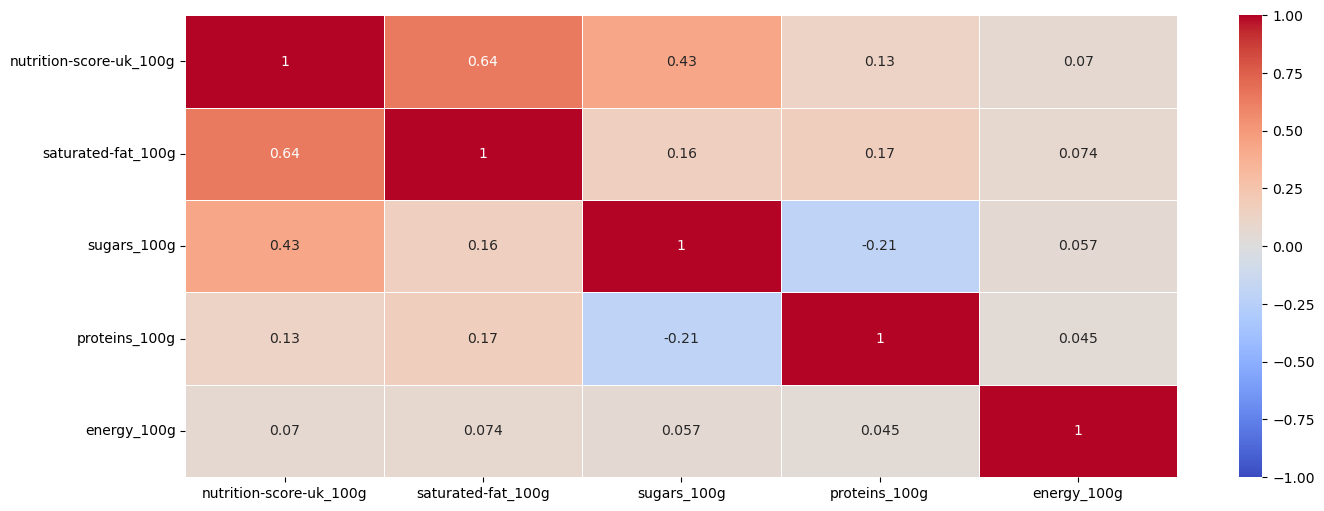

In [205]:
cm = df[['nutrition-score-uk_100g',
         'saturated-fat_100g',
         'sugars_100g',
         'proteins_100g',
         'energy_100g']].corr()

fig = plt.figure(figsize=(16,6))

sns.heatmap(cm,
            linewidths=.4,
            cmap='coolwarm',
            vmin=-1,
            annot=True)

plt.show()

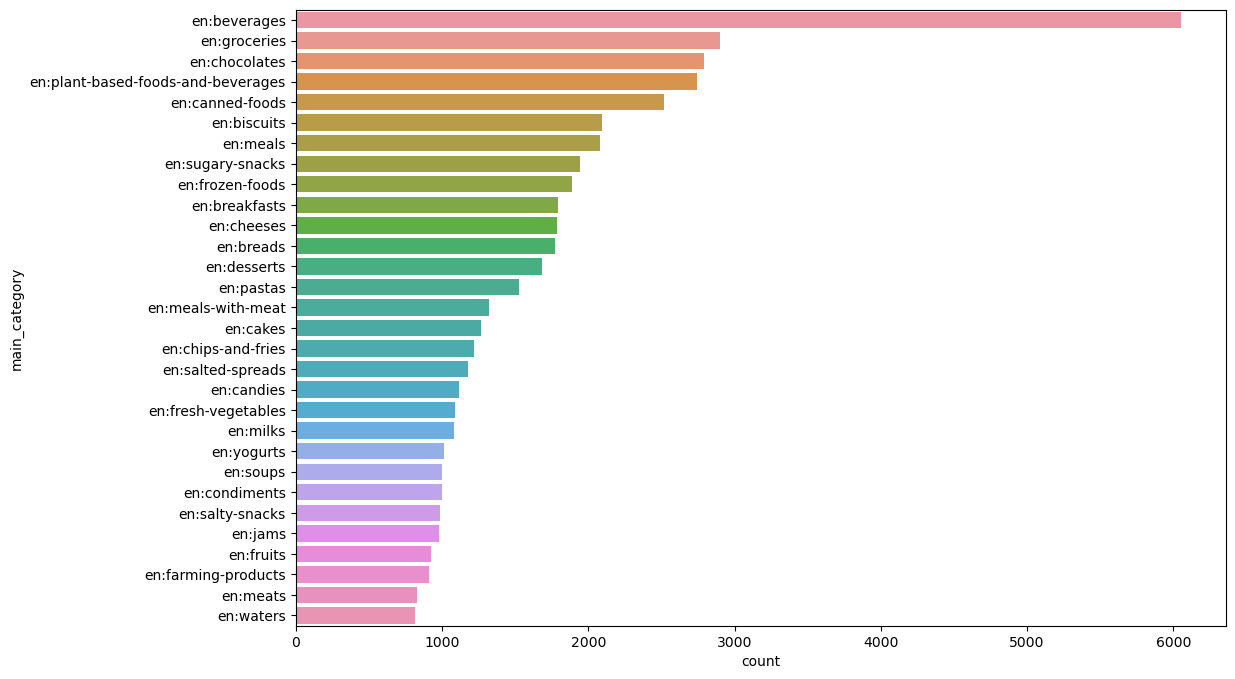

In [206]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_misc,
              y='main_category',
              order=df_misc['main_category'].value_counts()[:30].index)
plt.show()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [224]:
data = df.dropna(subset=target)[features + [target]]
data.shape

(84366, 7)

In [225]:
data = data.drop_duplicates(subset=features)
data.shape

(78749, 7)

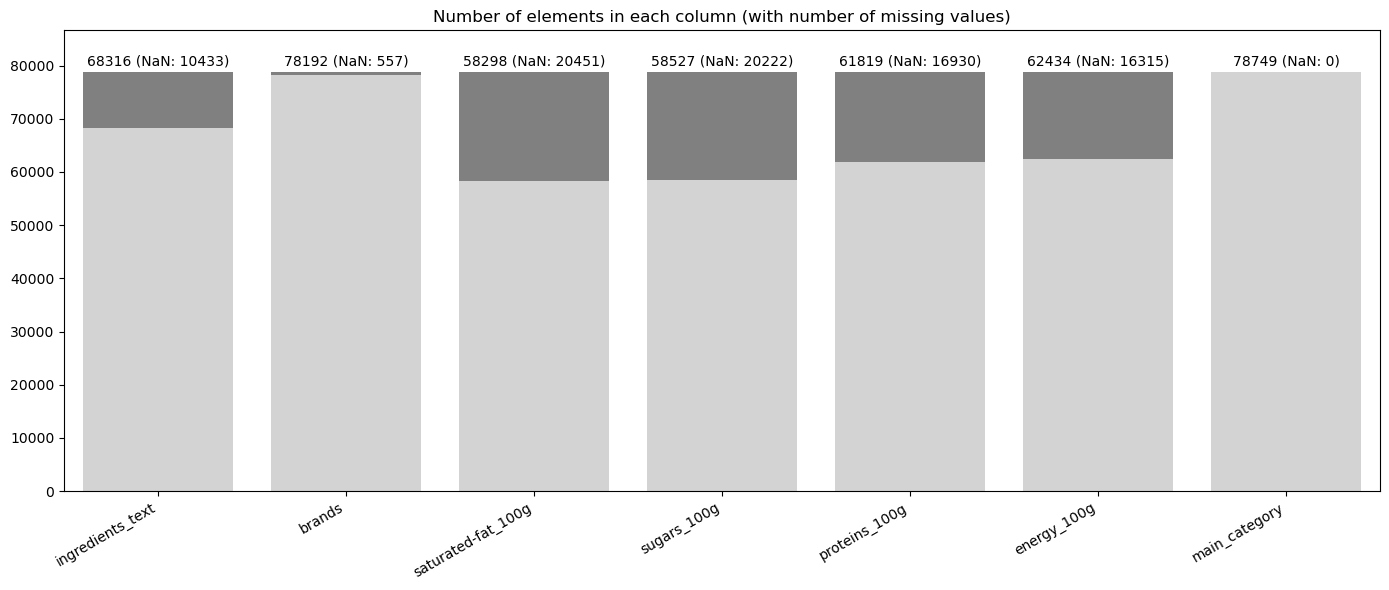

In [227]:
plt.figure(figsize=(14,6))
bar_total = sns.barplot(x=data.count().index, y=[len(data)]*len(data.count()), color='gray')
bar_elements = sns.barplot(x=data.count().index, y=data.count().values, color='lightgray')

for i, value in enumerate(data.count().values):
    bar_total.text(i, 1.01 * len(data), f'{value} (NaN: {len(data) - value})', ha='center', va='bottom', color='black')

bar_total.set_ylim(0, 1.1 * len(data))

plt.xticks(rotation=30, ha='right')
plt.title("Number of elements in each column (with number of missing values)")
plt.tight_layout()
plt.show()

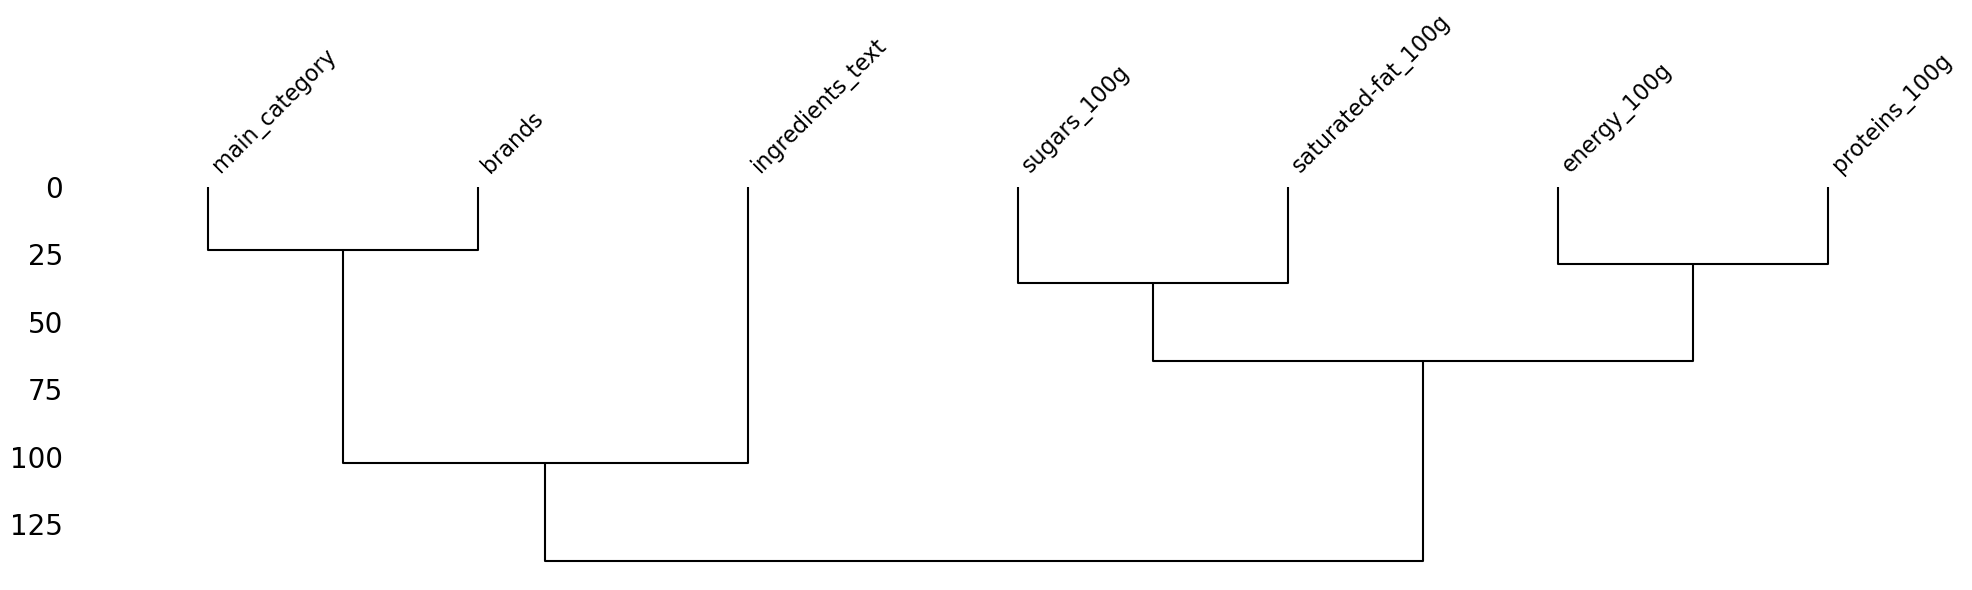

In [228]:
msno.dendrogram(data, figsize=(20, 6))
plt.tight_layout()
plt.show()

In [ ]:
class DataSelector(BaseEstimator, TransformerMixin):

    def __init__(self, features=[], target=''):
        self.features = features
        self.target = target

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.dropna(subset=self.target)[self.features + [self.target]] \
             .drop_duplicates(subset=self.features)

        return X